In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import accuracy_score,confusion_matrix
import math
import random

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255
x_train.shape

(60000, 28, 28)

In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,162 (910.79 KB)

 Trainable params: 233,162 (910.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7931 - loss: 0.6297 - val_accuracy: 0.9838 - val_loss: 0.0602
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9715 - loss: 0.1108 - val_accuracy: 0.9859 - val_loss: 0.0571
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9804 - loss: 0.0746 - val_accuracy: 0.9893 - val_loss: 0.0441
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9868 - loss: 0.0540 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9878 - loss: 0.0477 - val_accuracy: 0.9899 - val_loss: 0.0435
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9886 - loss: 0.0416 - val_accuracy: 0.9906 - val_loss: 0.0431
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9912 - loss: 0.0347 - val_accuracy: 0.9889 - val_loss: 0.0463
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9911 -

In [7]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [8]:
accuracy_score(y_test,y_pred)

0.9915

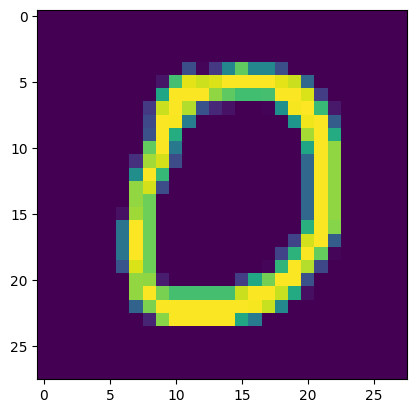

In [9]:
plt.imshow(x_test[10])

In [10]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [11]:
print(y_pred[10])


0


In [12]:
from PIL import Image
import numpy as np
import cv2

(100, 28, 28)
(100, 28, 28)


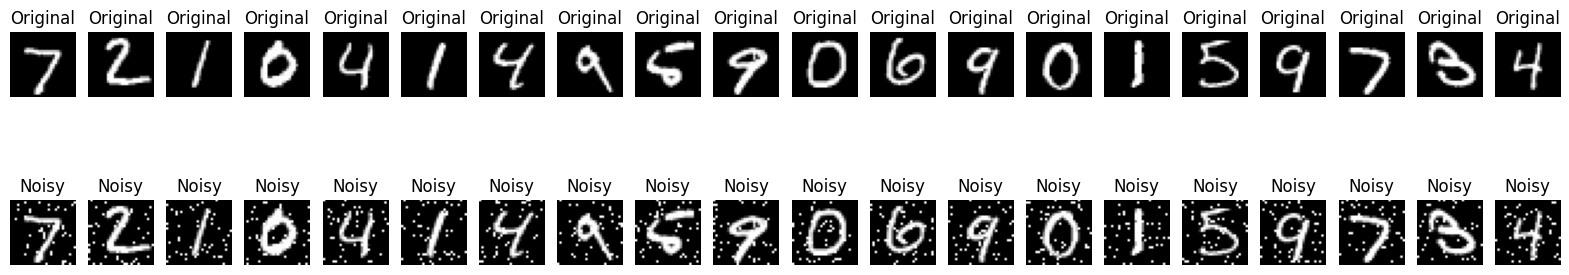

In [13]:
def add_dots(image, num_dots=50):
    noisy_image = image.copy()
    # plt.imshow(noisy_image)
    noisy_image*=255
    # print(noisy_image)
    for _ in range(num_dots):
        x = np.random.randint(0, image.shape[0])
        y = np.random.randint(0, image.shape[1])
        noisy_image[x, y] = 255  # Adding white dot
        # print(noisy_image)
    noisy_image=noisy_image/255
    return noisy_image

# Sample images from the dataset
sample_images = x_test[:100]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([add_dots(img) for img in sample_images])
print(noisy_images.shape)

# Display original and noisy images
fig, axes = plt.subplots(2, 20, figsize=(20, 4))
for i in range(20):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [14]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [15]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 8, 8, 7, 6, 9], dtype=int64)

In [16]:
accuracy_score(y_test[:100],y_pred)

0.97

(100, 28, 28)
(100, 28, 28)


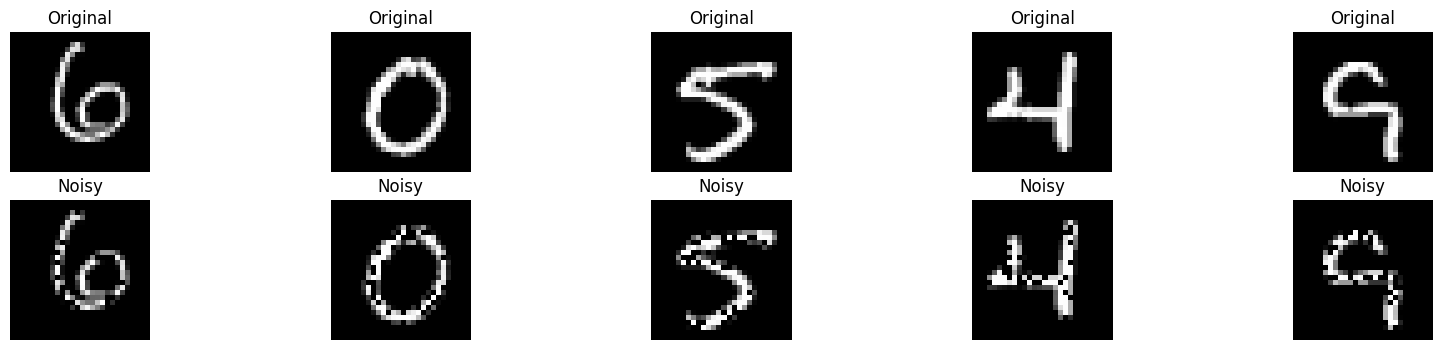

In [17]:
def missing_dots(image, num_dots=80):
    noisy_image = image.copy()
    # plt.imshow(noisy_image)
    noisy_image*=255
    # print(noisy_image)
    cnt=0
    for _ in range(280):
        i = np.random.randint(0, image.shape[0])
        j = np.random.randint(0, image.shape[1])
        if noisy_image[i,j]>=128:
            noisy_image[i, j] = 0
            cnt=cnt+1
            if cnt==num_dots:
                noisy_image=noisy_image/255
                return noisy_image
        
    noisy_image=noisy_image/255
    return noisy_image

# Sample images from the dataset
sample_images = x_test[100:200]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([missing_dots(img) for img in sample_images])
print(noisy_images.shape)

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [18]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [19]:
accuracy_score(y_test[100:200],y_pred)

0.92

(100, 28, 28)
(100, 28, 28)


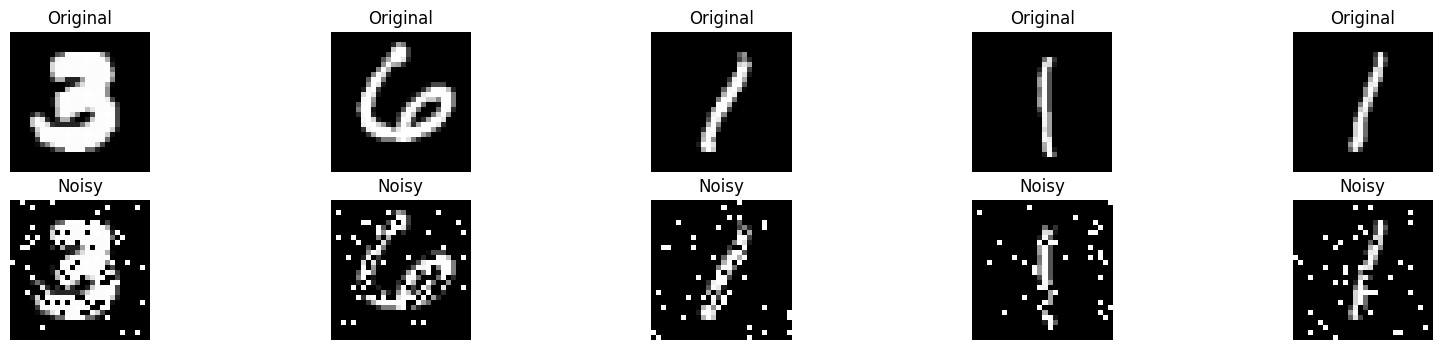

In [20]:
def add_loss_mixed(image, num_dots=100):
    noisy_image = image.copy()
    # plt.imshow(noisy_image)
    noisy_image*=255
    # print(noisy_image)
    for _ in range(math.floor(num_dots/2)):
        x = np.random.randint(0, image.shape[0])
        y = np.random.randint(0, image.shape[1])
        noisy_image[x, y] = 255 
    cnt=0
    for _ in range(200):
        i = np.random.randint(0, image.shape[0])
        j = np.random.randint(0, image.shape[1])
        if noisy_image[i,j]>=128:
            noisy_image[i, j] = 0
            cnt=cnt+1
            if cnt==num_dots/2:
                noisy_image=noisy_image/255
                return noisy_image   
    noisy_image=noisy_image/255
    return noisy_image

# Sample images from the dataset
sample_images = x_test[200:300]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([add_loss_mixed(img) for img in sample_images])
print(noisy_images.shape)

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [21]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [22]:
accuracy_score(y_test[200:300],y_pred)

0.86

(100, 28, 28)
(100, 28, 28)


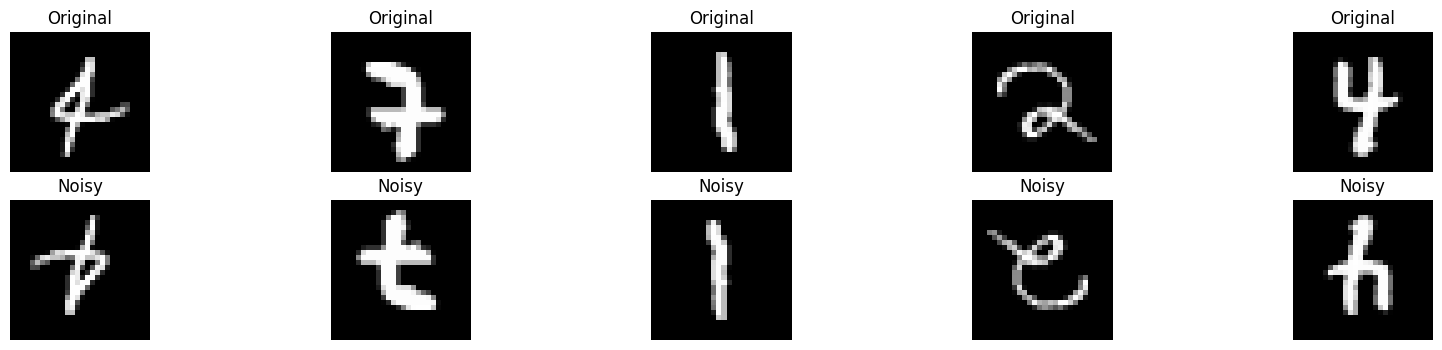

In [23]:
def rotated_image(image):
    # plt.imshow(noisy_image)
    rotated_img = Image.fromarray(image)
    rotated_img=rotated_img.rotate(180,Image.NEAREST)
    rotated_image_array = np.array(rotated_img)
    return rotated_image_array

# Sample images from the dataset
sample_images = x_test[300:400]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([rotated_image(img) for img in sample_images])
# for i in range(len(noisy_images)):
#     noisy_images[i] = np.array(noisy_images[i], dtype=np.float32)
# print(noisy_images[i].dtype)
print(noisy_images.shape)

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [24]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [25]:
accuracy_score(y_test[300:400],y_pred)

0.47

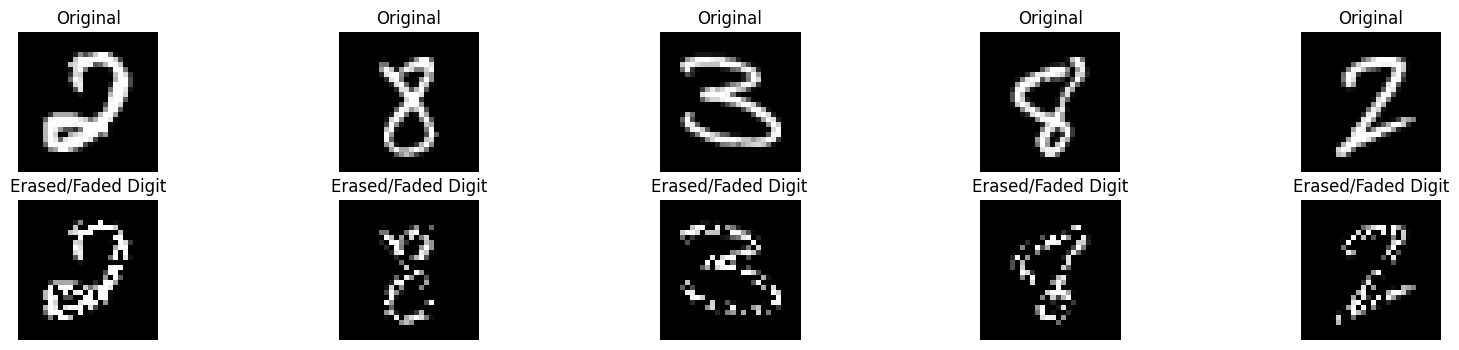

In [47]:
def erased_or_faded_digit(image, fade_factor=0.4):
    noisy_image = image.copy()
    mask = np.random.random(image.shape) > fade_factor
    noisy_image = noisy_image * mask
    # print(noisy_image)
    return noisy_image

# Sample images from the dataset
sample_images = x_test[400:500]

# Add erased or faded effect to the sampled images
erased_faded_images = np.array([erased_or_faded_digit(img) for img in sample_images])

# Visualize the original and erased/faded images
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Original Images
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

# Erased/Faded Digit Images
for i in range(5):
    axes[1, i].imshow(erased_faded_images[i], cmap='gray')
    axes[1, i].set_title('Erased/Faded Digit')
    axes[1, i].axis('off')

plt.show()

In [48]:
y_prob=model.predict(erased_faded_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [49]:
accuracy_score(y_test[400:500],y_pred)

0.78

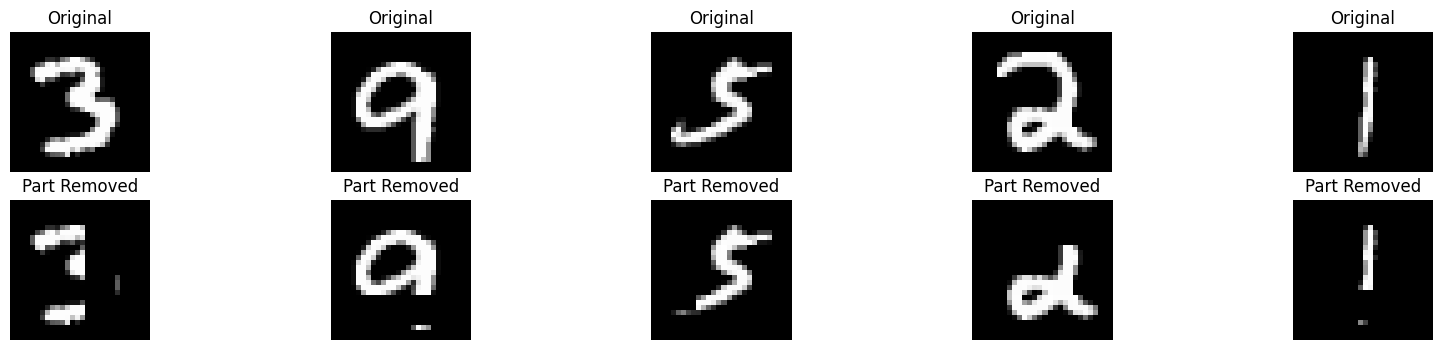

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate removing a specific part of the digit without affecting the background
def remove_part_of_digit(image, remove_direction='bottom', remove_ratio=0.3):
    noisy_image = image.copy()
    rows, cols = image.shape
    
    # Identify non-zero pixels (i.e., the digit)
    non_zero_indices = np.where(noisy_image > 0)
    min_row, max_row = np.min(non_zero_indices[0]), np.max(non_zero_indices[0])
    min_col, max_col = np.min(non_zero_indices[1]), np.max(non_zero_indices[1])
    
    if remove_direction == 'bottom':
        cutoff = int(max_row - (max_row - min_row) * remove_ratio)
        noisy_image[cutoff:max_row, min_col:max_col] = np.where(noisy_image[cutoff:max_row, min_col:max_col] > 0, 0, noisy_image[cutoff:max_row, min_col:max_col])
    elif remove_direction == 'top':
        cutoff = int(min_row + (max_row - min_row) * remove_ratio)
        noisy_image[min_row:cutoff, min_col:max_col] = np.where(noisy_image[min_row:cutoff, min_col:max_col] > 0, 0, noisy_image[min_row:cutoff, min_col:max_col])
    elif remove_direction == 'left':
        cutoff = int(min_col + (max_col - min_col) * remove_ratio)
        noisy_image[min_row:max_row, min_col:cutoff] = np.where(noisy_image[min_row:max_row, min_col:cutoff] > 0, 0, noisy_image[min_row:max_row, min_col:cutoff])
    elif remove_direction == 'right':
        cutoff = int(max_col - (max_col - min_col) * remove_ratio)
        noisy_image[min_row:max_row, cutoff:max_col] = np.where(noisy_image[min_row:max_row, cutoff:max_col] > 0, 0, noisy_image[min_row:max_row, cutoff:max_col])
    
    return noisy_image

# Sample images from the dataset
sample_images = x_test[500:600]

# Apply the part removal effect to the sampled images
dir=np.array(['bottom','top','right','left'])
removed_part_images = np.array([remove_part_of_digit(img, remove_direction=dir[random.randint(0,3)]) for img in sample_images])

# Visualize the original and part-removed images
fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Original Images
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

# Part Removed Images
for i in range(5):
    axes[1, i].imshow(removed_part_images[i], cmap='gray')
    axes[1, i].set_title('Part Removed')
    axes[1, i].axis('off')

plt.show()

In [59]:
y_prob=model.predict(removed_part_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [60]:
accuracy_score(y_test[500:600],y_pred)

0.86